In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
dtype_dict = {18: 'object', 21: 'object'}  
data = pd.read_csv('https://data.kingcounty.gov/api/views/vwmt-pvjw/rows.csv?accessType=DOWNLOAD', dtype=dtype_dict)
print(data.head())


   Sample ID  Grab ID  Profile ID Sample Number        Collect DateTime  \
0       2244   2244.0          22     L63668-18  09/21/2015 10:29:00 AM   
1       2531   2531.0         329      L63001-3  06/17/2015 10:43:00 AM   
2       3034   3034.0         818     L65361-20  06/07/2016 10:13:00 AM   
3       4609   4609.0        1263      L65931-3  08/15/2016 01:22:00 PM   
4       2747   2747.0          58     L62666-12  05/18/2015 09:22:00 AM   

   Depth (m)        Site Type                 Area Locator  \
0       54.2  Marine Offshore  Central Puget Sound  JSUR01   
1        1.0  Marine Offshore  Central Puget Sound  NSAJ02   
2      178.0  Marine Offshore  Central Puget Sound  LSNT01   
3        1.5  Marine Offshore  Central Puget Sound  LTUM03   
4      196.0  Marine Offshore  Central Puget Sound  KSBP01   

                                 Site  ...   MDL   RDL Text Value  \
0                         Point Wells  ...   NaN   NaN        NaN   
1                        Dockton Park 

In [4]:
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 1823627 rows and 25 columns.


In [5]:
print(data.describe())


          Sample ID       Grab ID    Profile ID     Depth (m)         Value  \
count  1.823627e+06  1.382637e+06  1.823627e+06  1.382637e+06  1.664010e+06   
mean   1.077565e+05  1.151409e+05  5.020562e+04  1.798527e+01  1.379201e+02   
std    6.864381e+04  6.509033e+04  2.381931e+04  3.039485e+01  5.161816e+03   
min    5.240000e+02  5.210000e+02  1.000000e+00  0.000000e+00 -1.700000e+00   
25%    4.034700e+04  6.264900e+04  4.069600e+04  1.000000e+00  7.690000e-01   
50%    1.056920e+05  1.163210e+05  4.714000e+04  9.000000e+00  7.500000e+00   
75%    1.719190e+05  1.746100e+05  7.474250e+04  2.100000e+01  2.860000e+01   
max    2.217920e+05  2.217920e+05  8.762600e+04  2.010000e+02  1.000000e+06   

          QualityId            MDL            RDL     Replicates  
count  1.823627e+06  983864.000000  970750.000000    3691.000000  
mean   1.634692e+00       0.337009       1.826027  161828.370360  
std    6.854528e-01       0.572068       3.304766   63902.764371  
min    0.000000e+00 

In [6]:
print(data.isnull().sum())


Sample ID                 0
Grab ID              440990
Profile ID                0
Sample Number             0
Collect DateTime          0
Depth (m)            440990
Site Type                 0
Area                   1313
Locator                   0
Site                      0
Parameter                 0
Value                159617
Units                   804
QualityId                 0
Lab Qualifier       1576295
MDL                  839763
RDL                  852877
Text Value          1585139
Sample Info         1813275
Steward Note        1821398
Replicates          1819936
Replicate Of        1820046
Method               191663
Date Analyzed        751172
Data Source               0
dtype: int64


In [7]:
# Calculate the percentage of missing data for each column
missing_percentage = data.isnull().sum() * 100 / len(data)
print(missing_percentage)


Sample ID            0.000000
Grab ID             24.182028
Profile ID           0.000000
Sample Number        0.000000
Collect DateTime     0.000000
Depth (m)           24.182028
Site Type            0.000000
Area                 0.071999
Locator              0.000000
Site                 0.000000
Parameter            0.000000
Value                8.752722
Units                0.044088
QualityId            0.000000
Lab Qualifier       86.437358
MDL                 46.049055
RDL                 46.768171
Text Value          86.922326
Sample Info         99.432340
Steward Note        99.877771
Replicates          99.797601
Replicate Of        99.803633
Method              10.509989
Date Analyzed       41.191099
Data Source          0.000000
dtype: float64


In [8]:
# List of columns to remove due to high percentage of missing values and non-relevant columns
columns_to_remove = ['Text Value', 'Sample Info', 'Steward Note', 'Replicates', 'Replicate Of','Date Analyzed','Data Source','Lab Qualifier','Sample ID','Grab ID','Sample Number','Collect DateTime' ]

# Remove the columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_remove)

# Check the new shape of the DataFrame to confirm columns are removed
print(data_cleaned.shape)


(1823627, 13)


In [9]:
# Calculate the percentage of missing data for each column
missing_percentage = data_cleaned.isnull().sum() * 100 / len(data_cleaned)
print(missing_percentage)


Profile ID     0.000000
Depth (m)     24.182028
Site Type      0.000000
Area           0.071999
Locator        0.000000
Site           0.000000
Parameter      0.000000
Value          8.752722
Units          0.044088
QualityId      0.000000
MDL           46.049055
RDL           46.768171
Method        10.509989
dtype: float64


<Axes: >

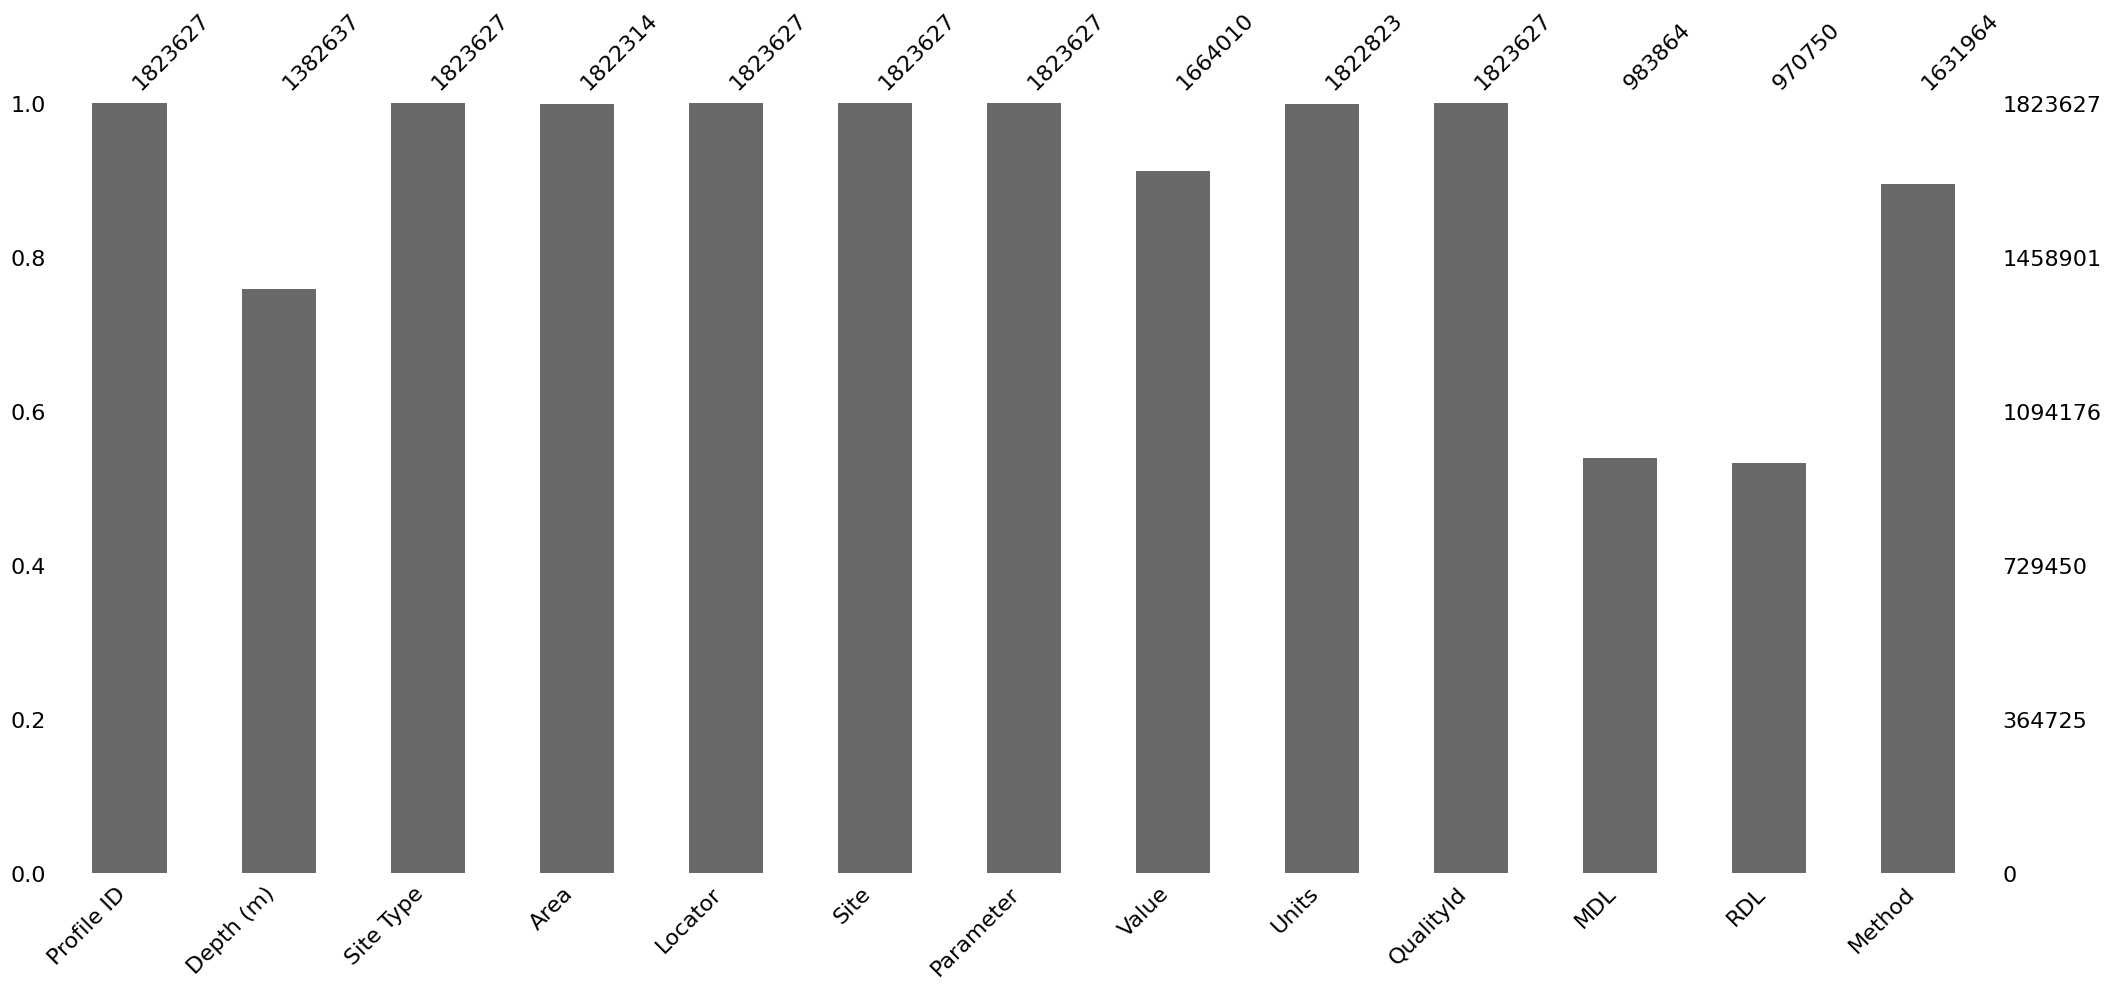

In [10]:
# Visualize the missingness
msno.bar(data_cleaned)


/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


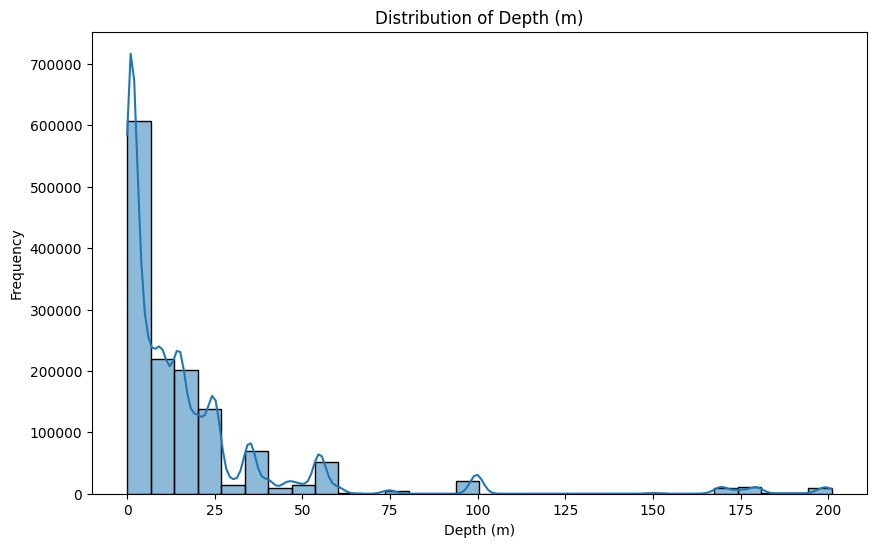

In [11]:
# Plot the distribution of 'Depth (m)' excluding missing values
plt.figure(figsize=(10, 6))
sns.histplot(data['Depth (m)'].dropna(), kde=True, bins=30)
plt.title('Distribution of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
# Create an imputer object using the median strategy
median_imputer = SimpleImputer(strategy='median')

# Impute missing values in 'Depth (m)'
data_cleaned['Depth (m)'] = median_imputer.fit_transform(data_cleaned[['Depth (m)']])

In [13]:
# Fill missing 'Area' values with the mode 
area_mode = data_cleaned['Area'].mode()[0]
data_cleaned['Area'] = data_cleaned['Area'].fillna(area_mode)

/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


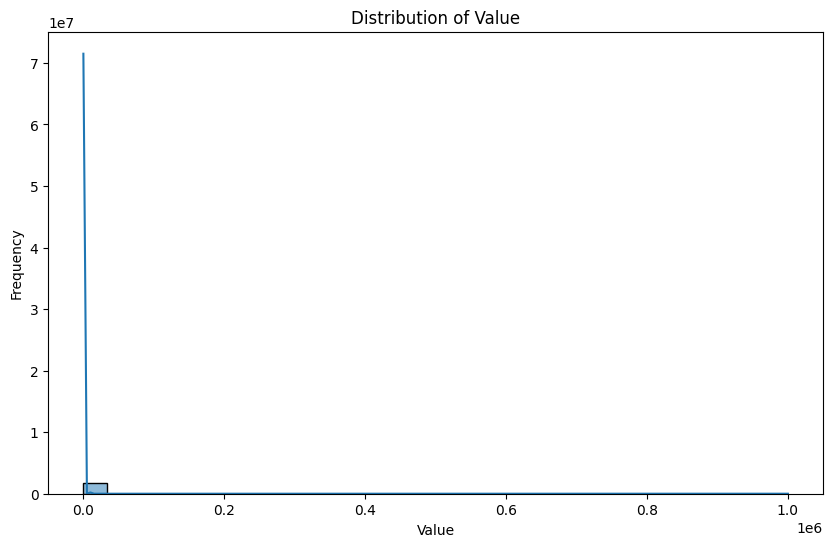

In [14]:
# Plot the distribution of 'Value' excluding missing values
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Value'].dropna(), kde=True, bins=30)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Impute missing values in 'Value'
data_cleaned['Value'] = median_imputer.fit_transform(data_cleaned[['Value']])


In [16]:
from sklearn.impute import SimpleImputer

# Create an imputer object for categorical data using the mode (most frequent) strategy
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values and convert to a 1D array if it's not
imputed_data = mode_imputer.fit_transform(data_cleaned[['Units']]).ravel()  # Convert to 1D array
data_cleaned['Units'] = imputed_data


In [17]:
# Create median imputer
median_imputer = SimpleImputer(strategy='median')

# Impute missing values for 'MDL' and 'RDL'
data_cleaned['MDL'] = median_imputer.fit_transform(data_cleaned[['MDL']])
data_cleaned['RDL'] = median_imputer.fit_transform(data_cleaned[['RDL']])

In [18]:
# Create mode imputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Perform the fit_transform operation separately
imputed_method = mode_imputer.fit_transform(data_cleaned[['Method']])

# Since fit_transform returns a 2D numpy array, convert it to 1D for direct assignment
imputed_method = imputed_method.ravel()

# Assign the imputed data back to 'Method' column
data_cleaned['Method'] = imputed_method

In [19]:
missing_percentage = data_cleaned.isnull().sum() * 100 / len(data_cleaned)
print(missing_percentage)

Profile ID    0.0
Depth (m)     0.0
Site Type     0.0
Area          0.0
Locator       0.0
Site          0.0
Parameter     0.0
Value         0.0
Units         0.0
QualityId     0.0
MDL           0.0
RDL           0.0
Method        0.0
dtype: float64


In [20]:
print(data_cleaned.describe())

         Profile ID     Depth (m)         Value     QualityId           MDL  \
count  1.823627e+06  1.823627e+06  1.823627e+06  1.823627e+06  1.823627e+06   
mean   5.020562e+04  1.581245e+01  1.265048e+02  1.634692e+00  2.739179e-01   
std    2.381931e+04  2.674405e+01  4.930882e+03  6.854528e-01  4.257045e-01   
min    1.000000e+00  0.000000e+00 -1.700000e+00  0.000000e+00  0.000000e+00   
25%    4.069600e+04  2.600000e+00  1.000000e+00  1.000000e+00  6.000000e-02   
50%    4.714000e+04  9.000000e+00  7.500000e+00  2.000000e+00  2.000000e-01   
75%    7.474250e+04  1.510000e+01  1.890000e+01  2.000000e+00  5.000000e-01   
max    8.762600e+04  2.010000e+02  1.000000e+06  9.000000e+00  1.000000e+02   

                RDL  
count  1.823627e+06  
mean   1.205868e+00  
std    2.500290e+00  
min    0.000000e+00  
25%    2.000000e-01  
50%    5.000000e-01  
75%    1.000000e+00  
max    1.000000e+02  


In [21]:
from Analysis import plot_distribution, plot_dual_distribution, plot_correlation_matrix_exclude_datetime



/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


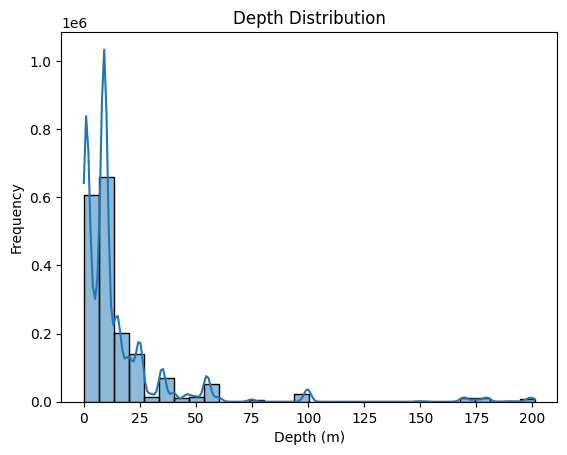

In [22]:
plot_distribution(data_cleaned, 'Depth (m)', kde=True, title='Depth Distribution')


/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


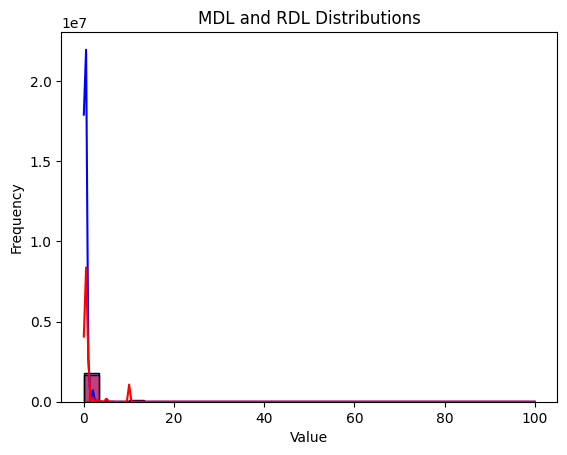

In [23]:
plot_dual_distribution(data_cleaned, 'MDL', 'RDL', title='MDL and RDL Distributions')


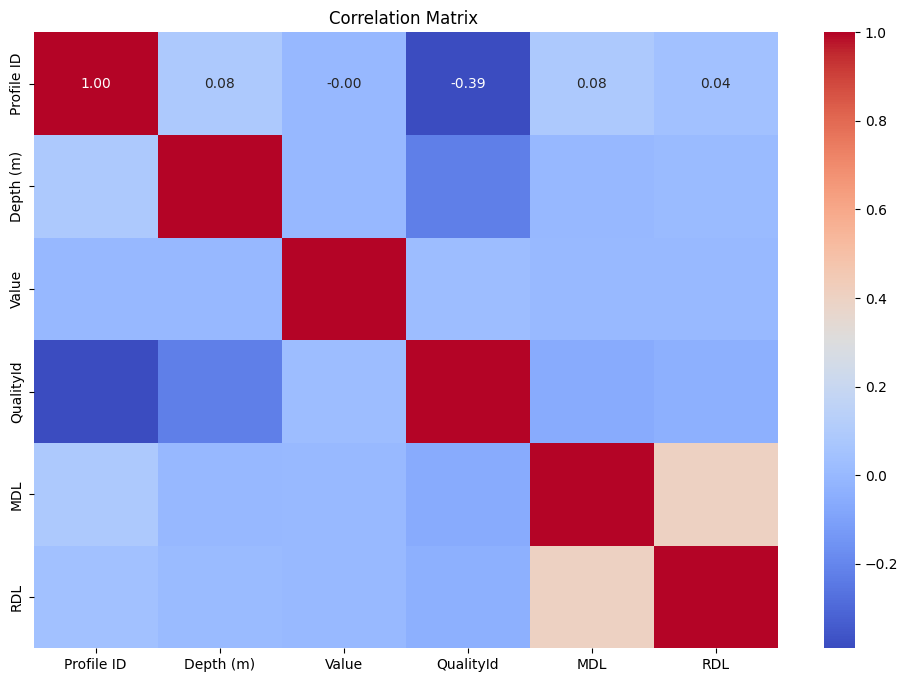

In [24]:

correlation_matrix = plot_correlation_matrix_exclude_datetime(data_cleaned)


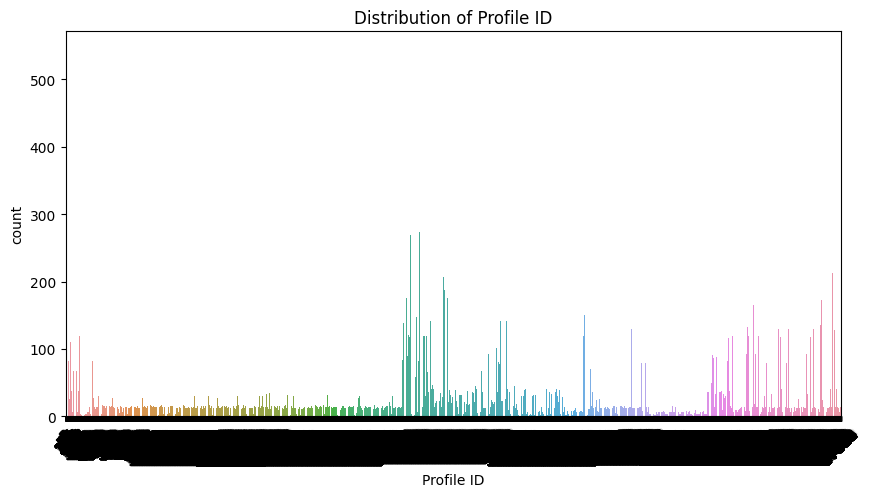

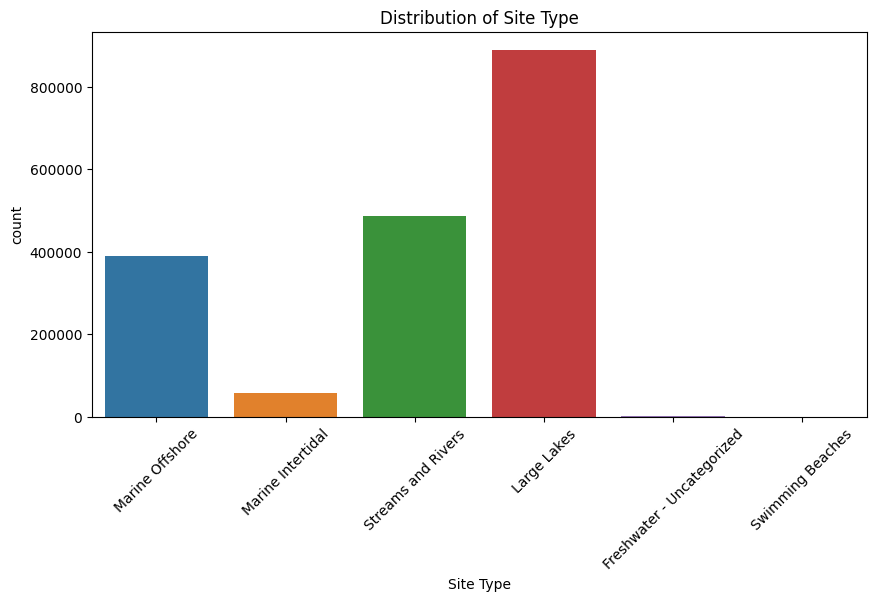

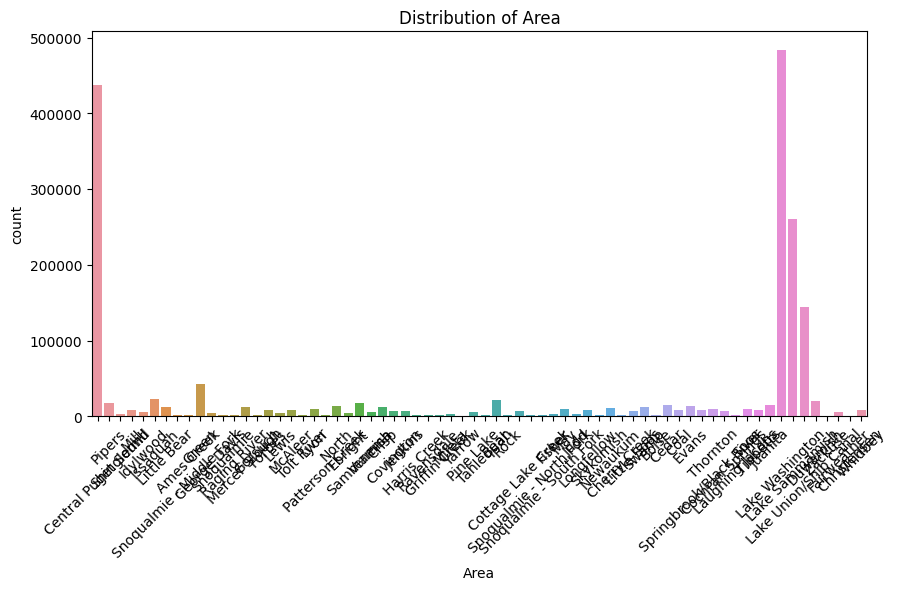

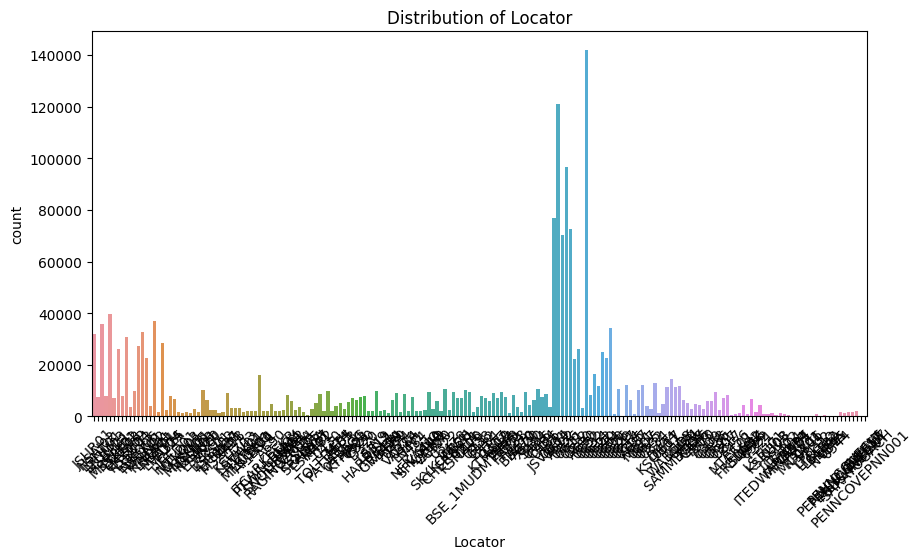

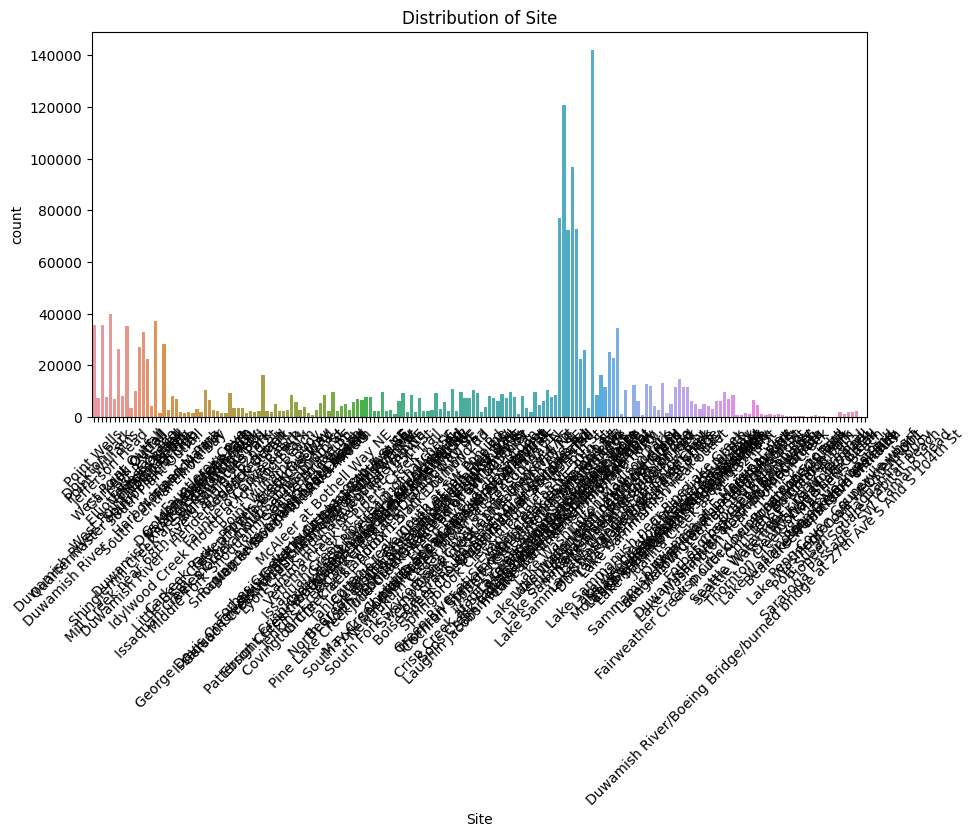

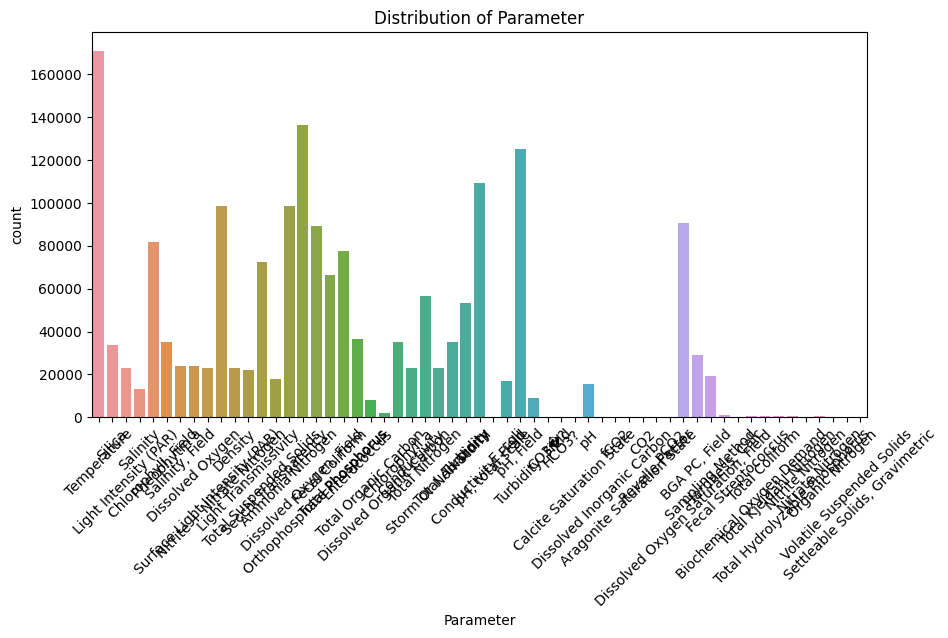

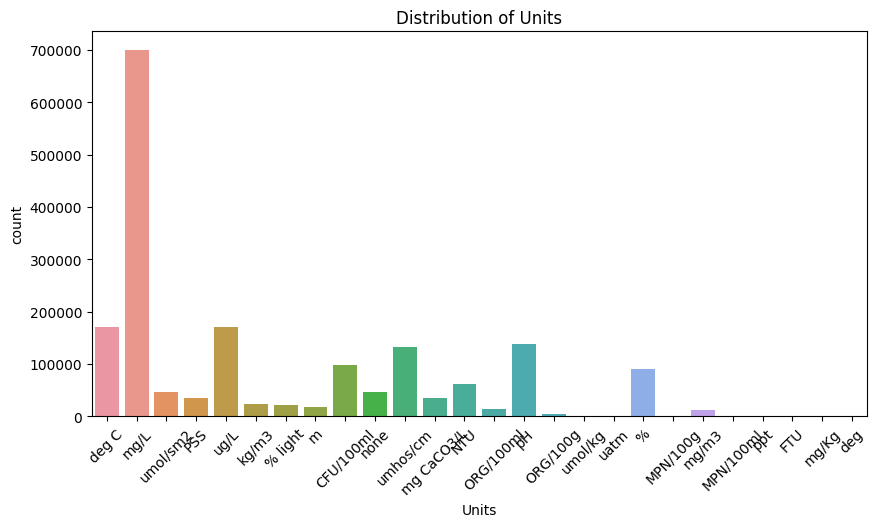

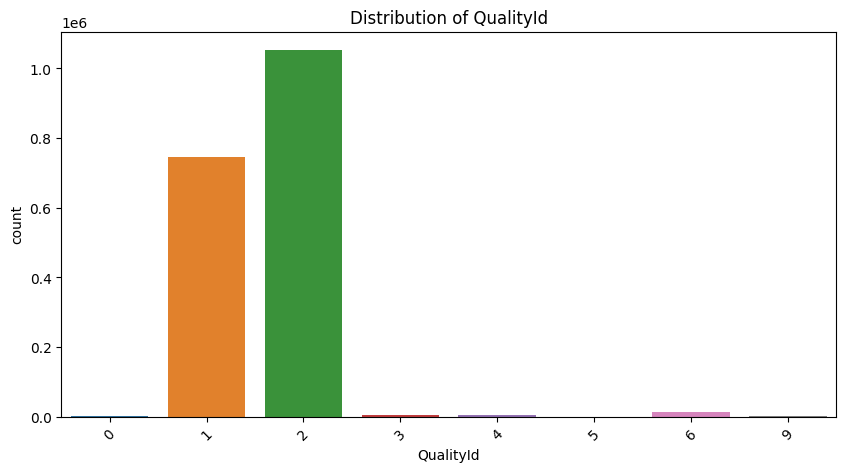

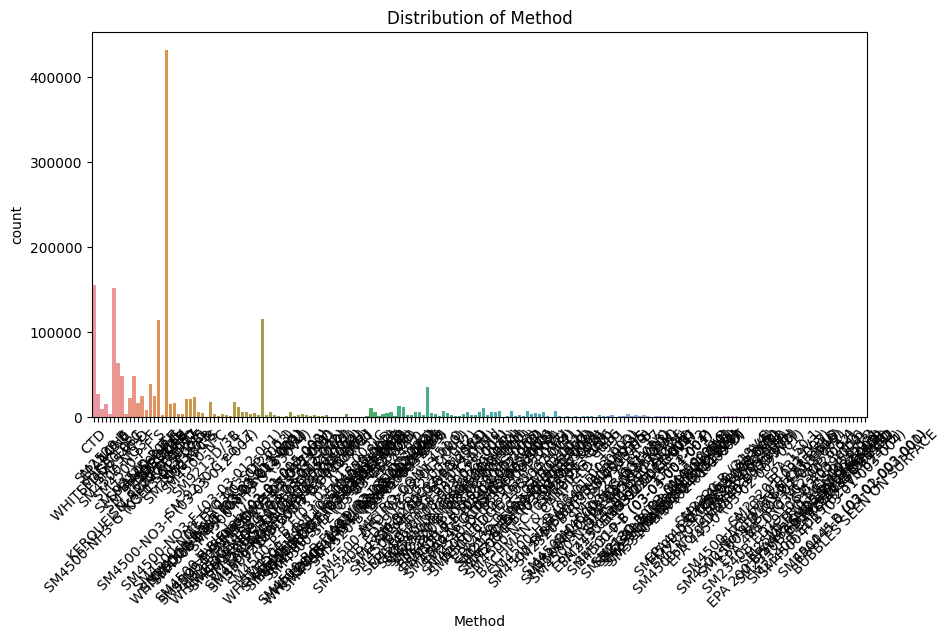

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_variables = ['Profile ID', 'Site Type', 'Area', 'Locator', 'Site', 'Parameter', 'Units', 'QualityId', 'Method']

for var in categorical_variables:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=data_cleaned)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()


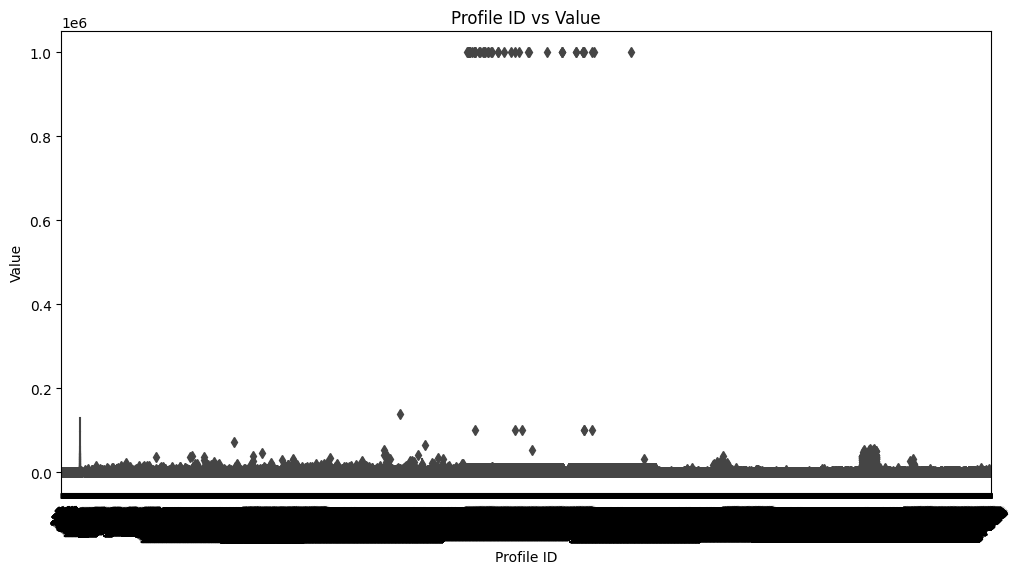

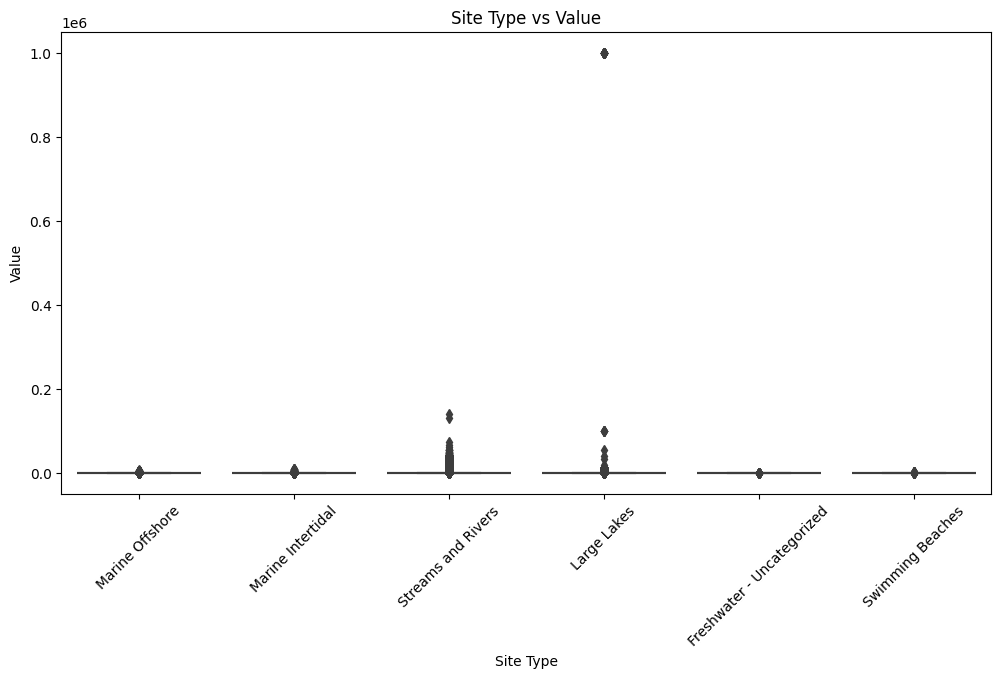

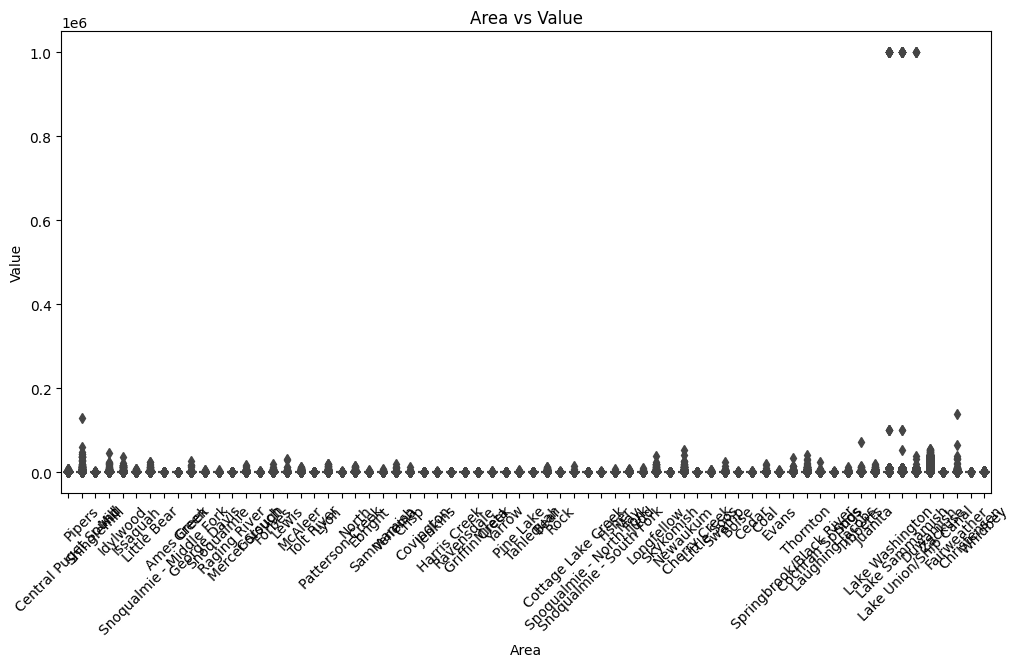

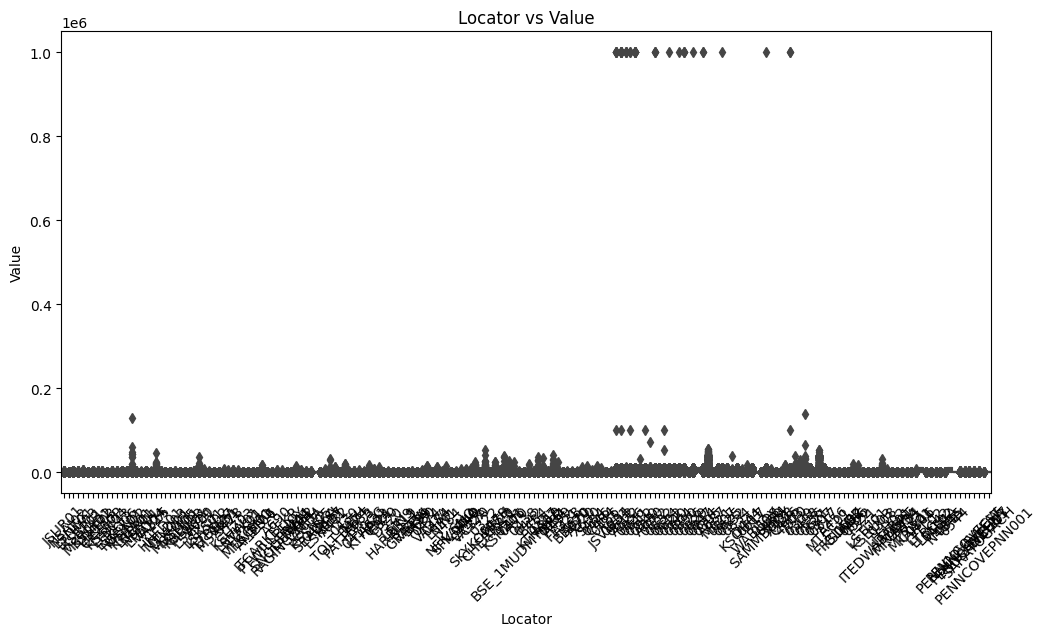

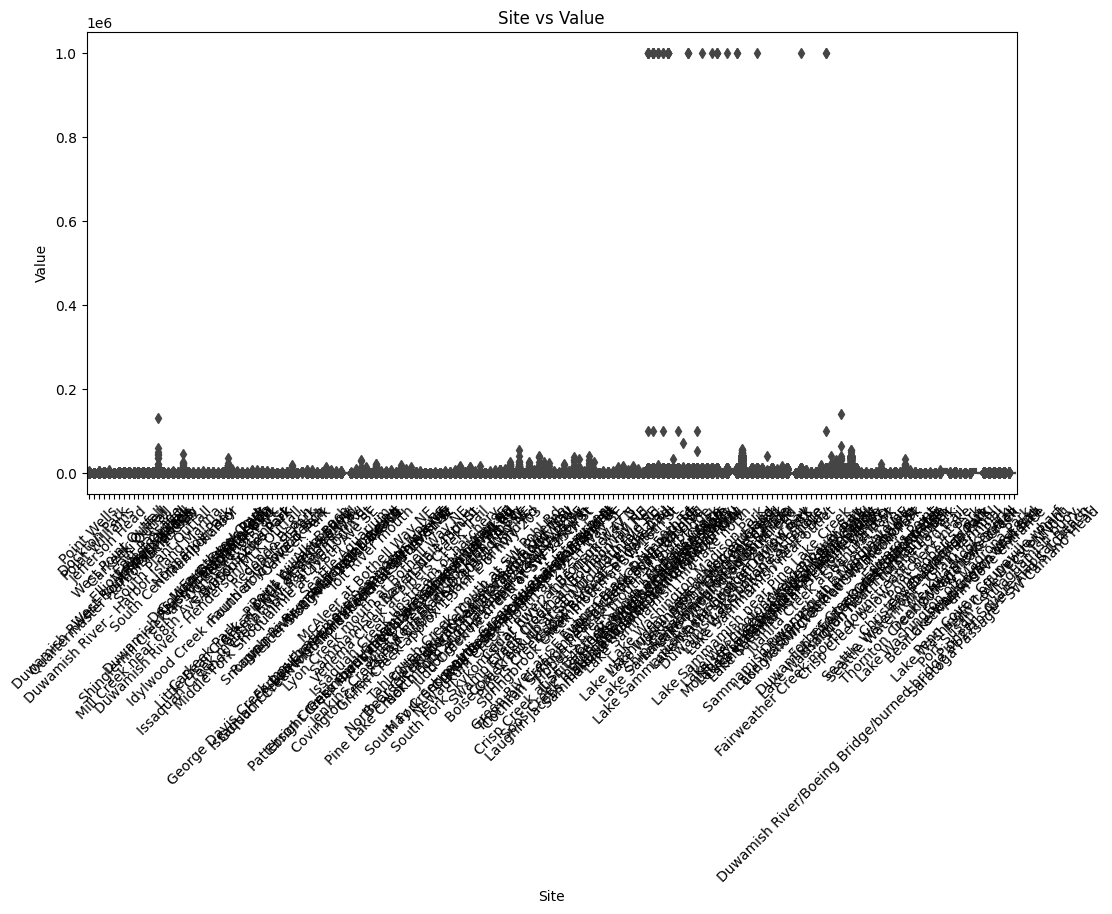

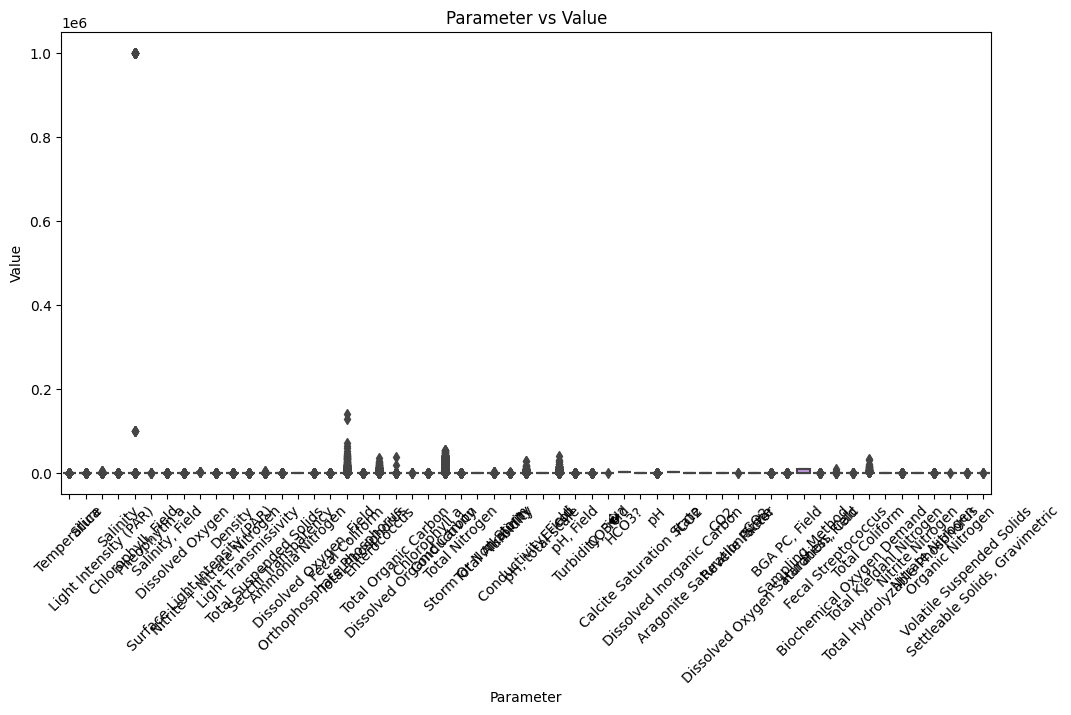

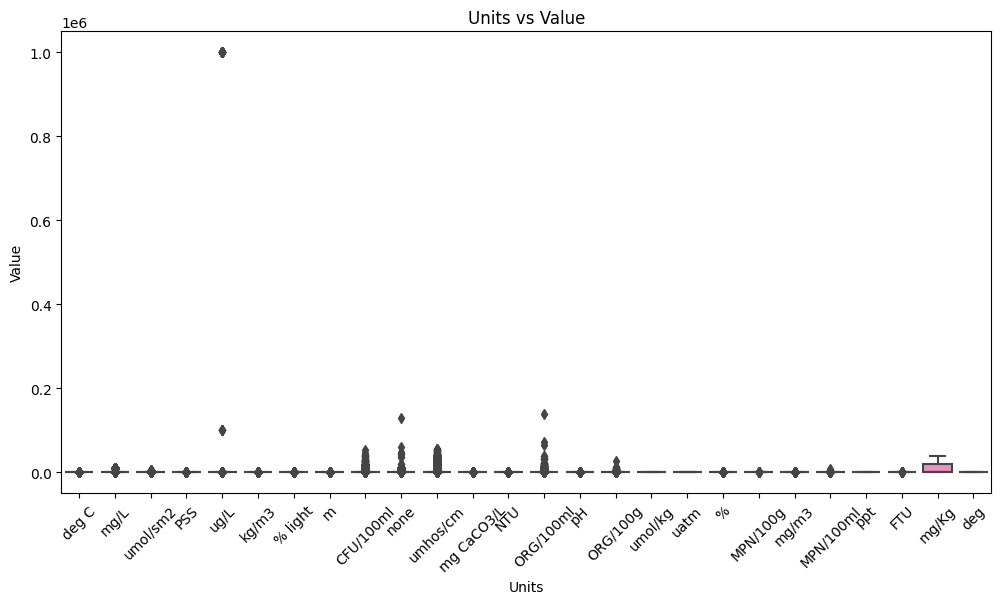

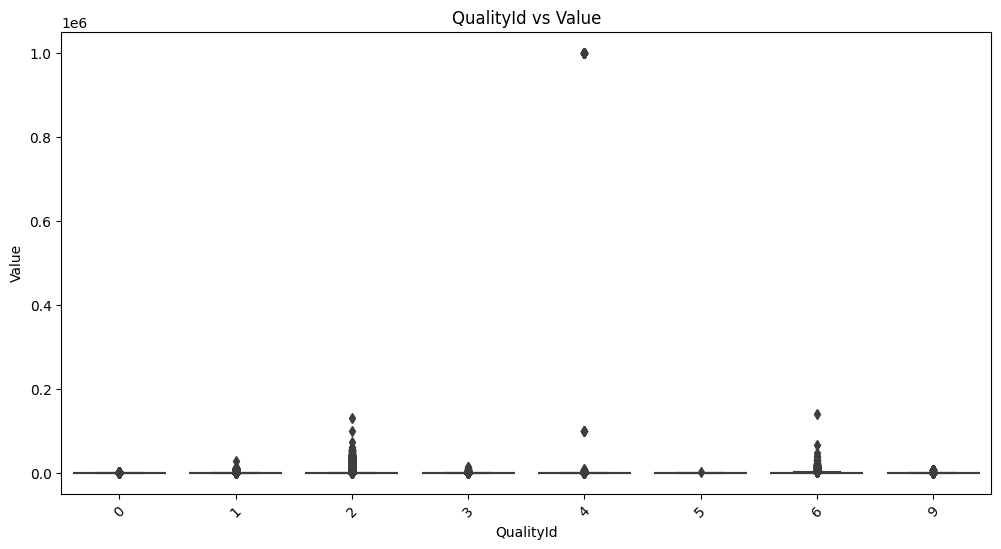

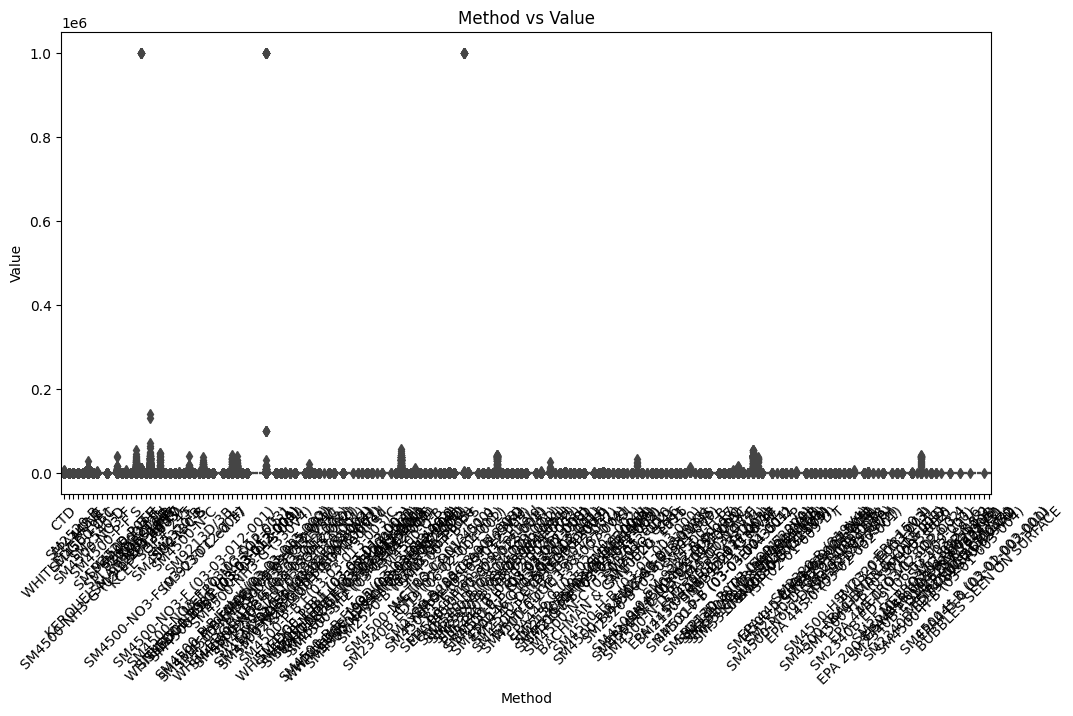

In [26]:
for var in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='Value', data=data_cleaned)
    plt.title(f'{var} vs Value')
    plt.xticks(rotation=45)
    plt.show()



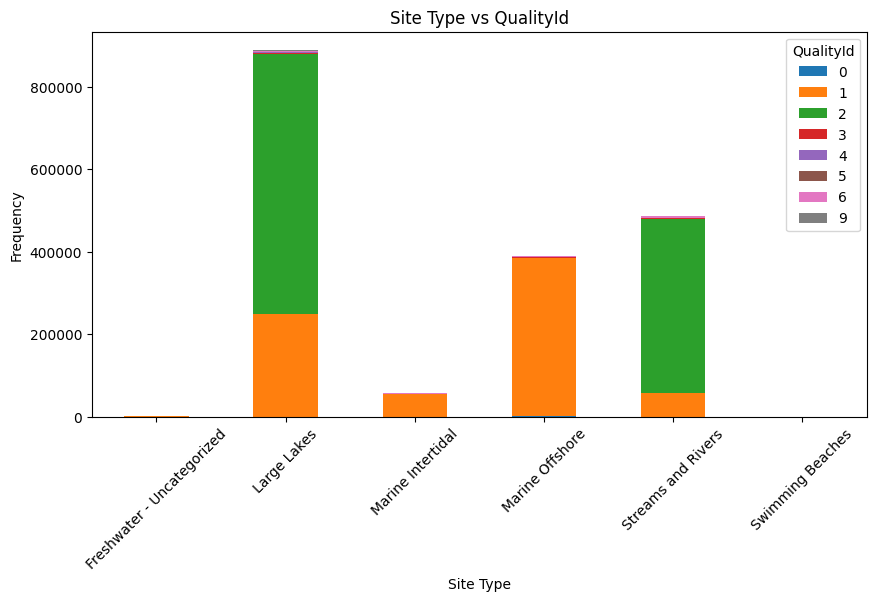

In [27]:
pd.crosstab(data_cleaned['Site Type'], data_cleaned['QualityId']).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Site Type vs QualityId')
plt.xlabel('Site Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = data_cleaned.drop('QualityId', axis=1) 
y = data_cleaned['QualityId']  

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Define transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.9860498017689991


/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saloni-jain/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.36      0.49       423
           1       0.98      1.00      0.99    223762
           2       0.99      0.99      0.99    315509
           3       0.63      0.13      0.22      1677
           4       0.93      0.50      0.65      1048
           5       0.00      0.00      0.00         7
           6       0.79      0.55      0.65      3899
           9       0.89      0.53      0.66       764

    accuracy                           0.99    547089
   macro avg       0.75      0.51      0.58    547089
weighted avg       0.98      0.99      0.98    547089

Confusion Matrix:
 [[   152    268      3      0      0      0      0      0]
 [    26 222910    638     44     17      0    124      3]
 [    16   1826 313119     81     10      0    430     27]
 [     0    656    796    221      0      0      4      0]
 [     0    286    220      0    521      0      1     20]
 [     0  